# Analysis of white matter moderation effects on the relationship between age and working memory scores

The aim of this analysis is to investigate how the development of indicators of brain maturation (in this case FA) relates to increases in working memory factors with age. In order to establish a moderation effect, three conditions have to be met:
- Age and working memory factors are associated
- Age and FA are associated
- FA and working memory factors are associated
- Age is a moderator of the relationship between FA and working memory factors

In [2]:
# Setting the working directory
setwd('/Users/joebathelt1/Documents/Projects/CALM_WorkingMemory/FA_analysis/')

In [3]:
# Loading the required packages
require(plyr)
require(ggplot2)
require(lavaan)
require(reshape2)
library(extrafont)
require(xtable)
require(IRdisplay)
require(repr)

Loading required package: plyr
Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.4Loading required package: lavaan
This is lavaan 0.5-20
lavaan is BETA software! Please report any bugs.
Loading required package: reshape2
Registering fonts with R
Loading required package: xtable
Loading required package: IRdisplay

Attaching package: ‘IRdisplay’

The following object is masked from ‘package:xtable’:

    display

Loading required package: repr


## 0. Distribution of working memory scores

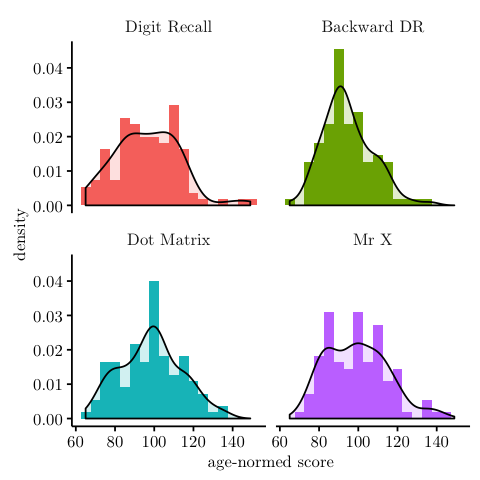

In [4]:
data <- read.csv("WhiteMatter_Eigenanatomy_Results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
data <- merge(data,behavioural_data,by="MRI.ID")
data <- data[,c('MRI.ID','AWMA_Digit_Recall_Standard','AWMA_Backward_Digit__Standard','AWMA_Dot_Matrix_Standard','AWMA_Mr_X__Standard')]
data <- melt(data, id=c('MRI.ID'))
data$variable <- factor(data$variable, 
                        levels=levels(data$variable), 
                        labels=c('Digit Recall','Backward DR','Dot Matrix','Mr X'))

options(repr.plot.width=4, repr.plot.height=4)

means <- aggregate(value ~ variable, data, mean)
stds <- aggregate(value ~ variable, data, sd)

print(
ggplot(data, aes(x=value, fill=variable)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=5) +
    geom_density(alpha=.2) + 
    xlab('age-normed score') + ylab('density') + 
    theme_classic() +
    theme(legend.position = 'none',
          legend.title=element_blank(), 
          text=element_text(size=12, family="CMU Serif"),
          legend.title = element_text(size=10, face='bold'),
          axis.text = element_text(size=10),
          axis.title = element_text(size=10, face='bold'),
          strip.text = element_text(size=10, face='bold'),
          axis.line.x = element_line(colour="black", size=0.5),
          axis.line.y = element_line(colour="black", size=0.5),
          strip.background = element_blank()) +
    facet_wrap(~variable) 
)

## 1. Establishing the relationship between Age and working memory factors
First, we need to establish the relationship between Age and the working memory factors that were based on working memory raw scores. To this end, I used a regression model with the working memory factor as the outcome and Age as the predictor - Gender is included as a nuisance regressor. Regression model:
$$Y_{FactorScore}=\beta_{Age}X_{Age}+\beta_{Gender}X_{Gender}+\beta_{Intercept}+\epsilon$$
 


In [5]:
data <- read.csv("WhiteMatter_Eigenanatomy_Results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
data <- merge(data,behavioural_data,by="MRI.ID")
data$Age_in_months <- scale(data$Age_in_months)

summary(lm(RC1 ~ Age_in_months + factor(Gender) + 1, data=data))
summary(lm(RC2 ~ Age_in_months + factor(Gender) + 1, data=data))
summary(lm(RC3 ~ Age_in_months + factor(Gender) + 1, data=data))


Call:
lm(formula = RC1 ~ Age_in_months + factor(Gender) + 1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02569 -0.73346 -0.08129  0.61317  2.92613 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.06132    0.15038  -0.408 0.684260    
Age_in_months    0.35208    0.09601   3.667 0.000384 ***
factor(Gender)1  0.14171    0.19509   0.726 0.469189    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9902 on 107 degrees of freedom
Multiple R-squared:  0.1242,	Adjusted R-squared:  0.1078 
F-statistic: 7.586 on 2 and 107 DF,  p-value: 0.0008297



Call:
lm(formula = RC2 ~ Age_in_months + factor(Gender) + 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2216 -0.6766 -0.0811  0.6863  3.3325 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -0.12186    0.14891  -0.818   0.4150  
Age_in_months    0.20476    0.09507   2.154   0.0335 *
factor(Gender)1  0.13400    0.19319   0.694   0.4894  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9805 on 107 degrees of freedom
Multiple R-squared:  0.05078,	Adjusted R-squared:  0.03303 
F-statistic: 2.862 on 2 and 107 DF,  p-value: 0.06155



Call:
lm(formula = RC3 ~ Age_in_months + factor(Gender) + 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3081 -0.5525 -0.0401  0.6831  2.3075 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.02567    0.14136   0.182    0.856    
Age_in_months    0.44021    0.09025   4.878 3.76e-06 ***
factor(Gender)1  0.03033    0.18338   0.165    0.869    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9307 on 107 degrees of freedom
Multiple R-squared:  0.1874,	Adjusted R-squared:  0.1722 
F-statistic: 12.33 on 2 and 107 DF,  p-value: 1.512e-05


**These results indicate that age significantly predictors working memory scores for all factors.**


In [ ]:
png("/Users/joebathelt1/Desktop/test.png",
  width     = 40,
  height    = 40,
  units     = "mm",
  res       = 600,
  pointsize = 1)

In [51]:
plotting_data <- data[,c('RC1','RC2','RC3','Age_in_months')]
plotting_data <- melt(plotting_data, id=c('Age_in_months'))
plotting_data$variable <- factor(plotting_data$variable, levels=c('RC1','RC2','RC3'), labels=c('Verbal','Executive','Visuo-spatial'))

png("/Users/joebathelt1/Desktop/test.png",
  width     = 40,
  height    = 40,
  units     = "mm",
  res       = 600,
  pointsize = 1)

ggplot(plotting_data,aes(x=Age_in_months, y=value, colour=factor(variable))) +
       geom_point(alpha=0.01, size=0.5) +
       stat_smooth(method='lm', se=FALSE) + 
       xlab('Age [scaled]') + ylab('Factor score') +
        theme_classic() +
        theme(legend.position = 'none',
              legend.title=element_blank(), 
              text=element_text(size=12, family="CMU Serif"),
              legend.title = element_text(size=10, face='bold'),
              axis.text = element_text(size=10),
              axis.title = element_text(size=10, face='bold'),
              strip.text = element_text(size=10, face='bold'),
              axis.line.x = element_line(colour="black", size=0.5),
              axis.line.y = element_line(colour="black", size=0.5))

dev.off()

pdf 
  2

## 2. Establishing the relationship between Age and FA
Next, we need to see if age is influencing white matter, i.e. FA. This is done by running regression models for each eigenanatomy component and then correcting the resulting p-values for multiple comparisons. Regression model:
$$Y_{Age}=\beta_{FA}X_{FA}+\beta_{Gender}X_{Gender}+\beta_{Intercept}+\epsilon$$

In [55]:
data <- read.csv("WhiteMatter_Eigenanatomy_Results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
data <- merge(data,behavioural_data,by="MRI.ID")

data <- melt(data, id=c("MRI.ID","AWMA_Digit_Recall_Raw","AWMA_Backward_Digit__Raw","AWMA_Dot_Matrix_Raw","AWMA_Mr_X__Raw","AWMA_Digit_Recall_Standard","AWMA_Dot_Matrix_Standard","AWMA_Backward_Digit__Standard","AWMA_Mr_X__Standard","Age_in_months","Gender","Movement","Study","RC2","RC1","RC3"))
data <- rename(data, replace = c("variable" = "component", "value" = "FA"))

# Scaling the data to z-scores 
data$Age_in_months <- scale(data$Age_in_months)
data$FA <- scale(data$FA)

Age_effect <- c()
Age_effect_tstat <- c()
Age_beta <- c()

for (i in 1:32){
    dat <- subset(data, data$component == paste('Component.',i,sep=""))
    Age_effect <- c(Age_effect, summary(lm(FA ~ Age_in_months + factor(Gender), data=dat))$coefficients[2,4])
    Age_effect_tstat <- c(Age_effect_tstat, summary(lm(FA ~ Age_in_months + factor(Gender), data=dat))$coefficients[2,3])
    Age_beta <- c(Age_beta, summary(lm(FA ~ Age_in_months + Gender, data=dat))$coefficients[2,1])
}

# Get the effect of age after correcting for multiple comparisons 
Age_effect_corrected <- p.adjust(Age_effect, method='bonferroni')

# Creating a dataframe that only contains the significant components
dat <- data[data$component %in% levels(data$component)[which(Age_effect < 0.05)],]

# Create a table with results
df <- data.frame(Age_effect_tstat, Age_effect, Age_effect_corrected)
df <- data.frame(levels(data$component)[Age_effect_corrected < 0.05], Age_effect_tstat[Age_effect_corrected < 0.05], Age_effect[Age_effect_corrected < 0.05], Age_effect_corrected[Age_effect_corrected < 0.05])
colnames(df) <- c('component','t-statistic','p-value','corrected p')
table <- xtable(x = df, digits=c(0,0,2,3,3))

This table shows the statistics for 30 out of 32 of the eigenanatomy components that showed a significant effect of FA

In [56]:
xtable(table, type="html")

,component,t-statistic,p-value,corrected p
1,Component.2,4.390505,2.665542e-05,0.0008529735
2,Component.3,4.234922,4.853321e-05,0.001553063
3,Component.4,4.407207,2.497491e-05,0.0007991972
4,Component.5,3.718175,0.0003213115,0.01028197
5,Component.6,4.454455,2.075616e-05,0.0006641972
6,Component.7,4.678071,8.509283e-06,0.000272297
7,Component.8,3.289249,0.001360343,0.04353099
8,Component.9,4.524667,1.573171e-05,0.0005034147
9,Component.10,3.729832,0.0003084458,0.009870267
10,Component.11,5.355284,4.92625e-07,1.5764e-05


**Conclusion**: Age is a significant positive predictor of changes in FA


Plotting the relationship between Age and FA


In [58]:
# Plot age vs FA for all the significant components 
options(repr.plot.width=4, repr.plot.height=4)
dat$component <- factor(dat$component, levels=levels(dat$component), labels=1:32)

png("/Users/joebathelt1/Desktop/test.png",
  width     = 40,
  height    = 40,
  units     = "mm",
  res       = 600,
  pointsize = 1)

print(ggplot(dat, aes(x=Age_in_months, y=FA, colour=factor(component))) +
    geom_point(size=0.5, alpha=0.2) + 
    stat_smooth(method='lm', size=1, se=FALSE) +
    xlab('Age [scaled]') + 
    ylab('FA [scaled]') +
    theme_classic() +
    theme(legend.position = 'none',
          text=element_text(size=12, family="CMU Serif"),
          legend.title = element_text(size=10, face='bold'),
          axis.text = element_text(size=10),
          axis.title = element_text(size=10, face='bold'),
          strip.text = element_text(size=10, face='bold'),
          axis.line.x = element_line(colour="black", size=0.5),
          axis.line.y = element_line(colour="black", size=0.5)))
    #facet_wrap(~component)
dev.off()

pdf 
  2

## 3. Establishing the relationship between FA and working memory factors¶
Now, we investigate the relationship between FA and working memory scores. This model uses working memory factor as the outcome and FA as the predictor. Gender is again included as a nuisance regressor. The regression model:
$$y_{Factor} = \beta_{FA}X_{FA} + \beta_{Gender}X_{Gender} + \beta_{Intercept} + \epsilon$$

In [20]:
data <- read.csv("WhiteMatter_Eigenanatomy_Results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
data <- merge(data,behavioural_data,by="MRI.ID")
data <- melt(data, id=c("MRI.ID","AWMA_Digit_Recall_Raw","AWMA_Backward_Digit__Raw","AWMA_Dot_Matrix_Raw","AWMA_Mr_X__Raw","AWMA_Digit_Recall_Standard","AWMA_Dot_Matrix_Standard","AWMA_Backward_Digit__Standard","AWMA_Mr_X__Standard","Age_in_months","Gender","Movement","Study","RC2","RC1","RC3"))
data <- rename(data, replace = c("variable" = "component", "value" = "FA"))

data$Age_in_months <- scale(data$Age_in_months)
data$FA <- scale(data$FA)

# Analysis of moderation effects
RC1_FA <- c()
RC2_FA <- c()
RC3_FA <- c()

RC1_tstat <- c()
RC2_tstat <- c()
RC3_tstat <- c()

for (i in 1:32){
    dat <- subset(data, data$component == paste('Component.',i,sep=""))
    
    RC1_FA <- c(RC1_FA, summary(lm(RC1 ~ Gender + FA, data=dat))$coefficients[3,4])
    RC2_FA <- c(RC2_FA, summary(lm(RC2 ~ Gender + FA, data=dat))$coefficients[3,4])
    RC3_FA <- c(RC3_FA, summary(lm(RC3 ~ Gender + FA, data=dat))$coefficients[3,4])
    
    RC1_tstat <- c(RC1_tstat, summary(lm(RC1 ~ Gender + FA, data=dat))$coefficients[3,3])
    RC2_tstat <- c(RC2_tstat, summary(lm(RC2 ~ Gender + FA, data=dat))$coefficients[3,3])
    RC3_tstat <- c(RC3_tstat, summary(lm(RC3 ~ Gender + FA, data=dat))$coefficients[3,3])
}

# Bonferroni correction for multiple comparisons
RC1_FA_corrected <- p.adjust(RC1_FA, method='bonferroni')
RC2_FA_corrected <- p.adjust(RC2_FA, method='bonferroni')
RC3_FA_corrected <- p.adjust(RC3_FA, method='bonferroni')

dat <- data[data$component %in% levels(data$component)[which(RC2_FA_corrected < 0.05)],]
df <- data.frame(levels(data$component)[RC2_FA_corrected < 0.05], RC2_tstat[RC2_FA_corrected < 0.05], RC2_FA[RC2_FA_corrected < 0.05], RC2_FA_corrected[RC2_FA_corrected < 0.05])
colnames(df) <- c('component','t-statistic','p-value','corrected p')
table <- xtable(x = df, digits=c(0,0,2,3,3))

Table showing the components with significant FA effects


In [21]:
xtable(table, type="html")

,component,t-statistic,p-value,corrected p
1,Component.2,3.728088,0.0003103393,0.009930858
2,Component.3,3.407499,0.0009248486,0.02959516
3,Component.4,3.391052,0.0009763842,0.03124429
4,Component.6,3.305057,0.001292647,0.04136472
5,Component.7,3.354968,0.001099042,0.03516935
6,Component.8,3.407792,0.0009239544,0.02956654
7,Component.9,3.791599,0.0002480471,0.007937507
8,Component.10,3.810145,0.0002322293,0.007431338
9,Component.13,3.545099,0.0005834958,0.01867187
10,Component.16,3.316899,0.001244018,0.03980857


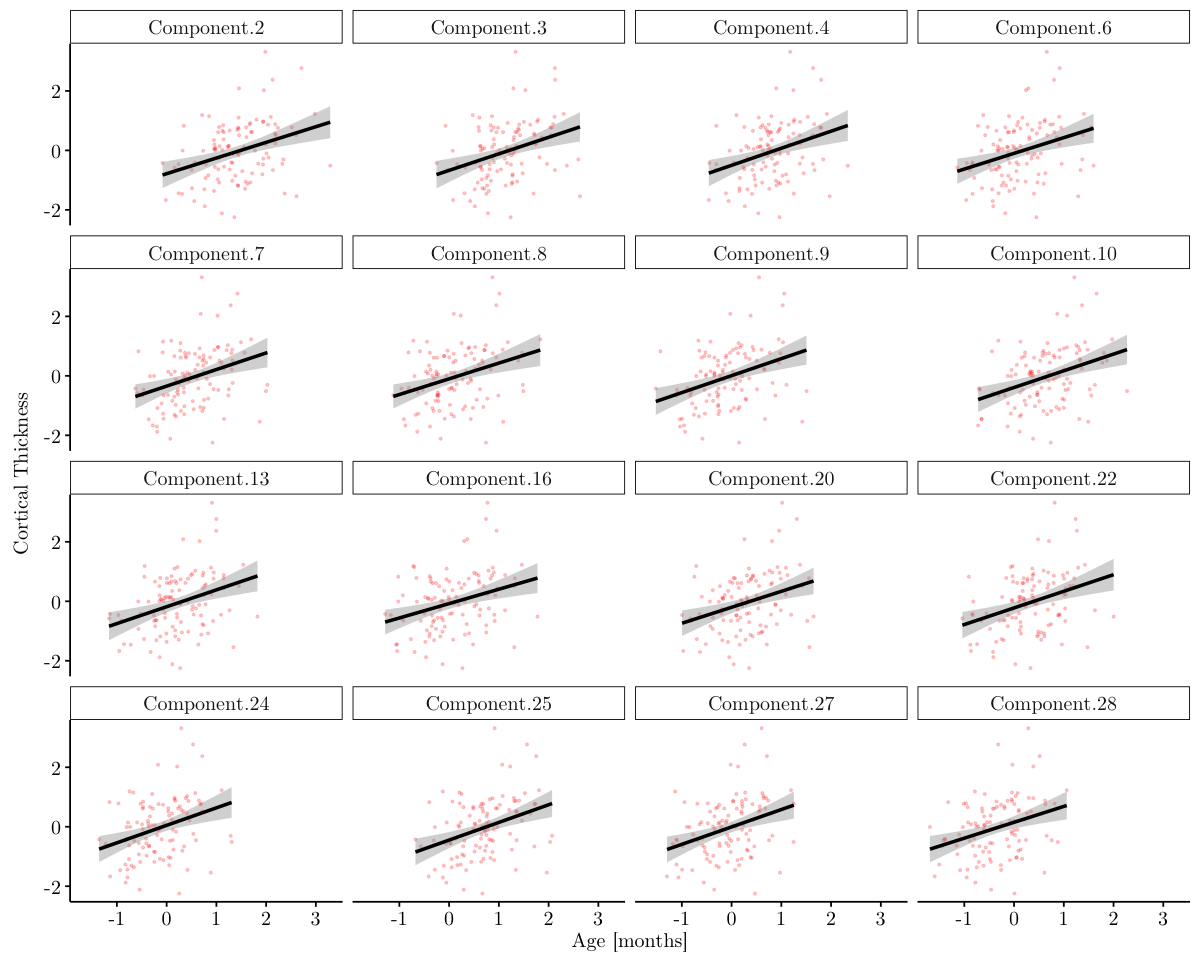

In [22]:
# Plot age vs FA for all the significant components 
options(repr.plot.width=10, repr.plot.height=8)
ggplot(dat, aes(x=FA, y=RC2)) +
    geom_point(colour='red',size=0.5, alpha=0.2) + 
    stat_smooth(method='lm', colour='black', size=1) +
    xlab('Age [months]') + 
    ylab('Cortical Thickness') +
    theme_classic() +
    theme(legend.position = 'right',
          text=element_text(size=12, family="CMU Serif"),
          legend.title = element_text(size=12, face='bold'),
          axis.text = element_text(size=12),
          axis.title = element_text(size=12, face='bold'),
          strip.text = element_text(size=12, face='bold'),
          axis.line.x = element_line(colour="black", size=0.5),
          axis.line.y = element_line(colour="black", size=0.5)) +
    facet_wrap(~component)

## 4. Moderation effect of FA for the relationship between Age and Working Memory factors

In [60]:
data <- read.csv("WhiteMatter_Eigenanatomy_Results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
data <- merge(data,behavioural_data,by="MRI.ID")
data <- melt(data, id=c("MRI.ID","AWMA_Digit_Recall_Raw","AWMA_Backward_Digit__Raw","AWMA_Dot_Matrix_Raw","AWMA_Mr_X__Raw","AWMA_Digit_Recall_Standard","AWMA_Dot_Matrix_Standard","AWMA_Backward_Digit__Standard","AWMA_Mr_X__Standard","Age_in_months","Gender","Movement","Study","RC2","RC1","RC3"))
data <- rename(data, replace = c("variable" = "component", "value" = "FA"))

data$Age_in_months <- scale(data$Age_in_months)
data$FA <- scale(data$FA)

# Analysis of moderation effects
RC1_moderation <- c()
RC2_moderation <- c()
RC3_moderation <- c()

RC1_tstat <- c()
RC2_tstat <- c()
RC3_tstat <- c()

for (i in 1:32){
    dat <- subset(data, data$component == paste('Component.',i,sep=""))
    RC1_moderation <- c(RC1_moderation, summary(lm(RC1 ~ Age_in_months + Gender + Movement + FA + Age_in_months*FA, data=dat))$coefficients[6,4])
    RC2_moderation <- c(RC2_moderation, summary(lm(RC2 ~ Age_in_months + Gender + Movement +  FA + Age_in_months*FA, data=dat))$coefficients[6,4])
    RC3_moderation <- c(RC3_moderation, summary(lm(RC3 ~ Age_in_months + Gender + Movement + FA + Age_in_months*FA, data=dat))$coefficients[6,4])
    
    RC1_tstat <- c(RC1_tstat, summary(lm(RC1 ~ Gender + FA, data=dat))$coefficients[3,3])
    RC2_tstat <- c(RC2_tstat, summary(lm(RC2 ~ Gender + FA, data=dat))$coefficients[3,3])
    RC3_tstat <- c(RC3_tstat, summary(lm(RC3 ~ Gender + FA, data=dat))$coefficients[3,3])
}

RC1_moderation_corrected <- p.adjust(RC1_moderation, method='bonferroni')
RC2_moderation_corrected <- p.adjust(RC2_moderation, method='bonferroni')
RC3_moderation_corrected <- p.adjust(RC3_moderation, method='bonferroni')

dat <- data[data$component %in% levels(data$component)[which(RC2_moderation_corrected < 0.05)],]
df <- data.frame(levels(data$component)[RC2_moderation_corrected < 0.05], RC2_tstat[RC2_moderation_corrected < 0.05], RC2_moderation[RC2_moderation_corrected < 0.05], RC2_moderation_corrected[RC2_moderation_corrected < 0.05])
colnames(df) <- c('component','t-statistic','p-value','corrected p')
table <- xtable(x = df, digits=c(0,0,2,3,3))

In [61]:
xtable(table, type="html")

,component,t-statistic,p-value,corrected p
1,Component.1,3.129734,0.001115945,0.03571025
2,Component.2,3.728088,0.0012089,0.03868479


In [62]:
# Plot age vs FA for all the significant components 
options(repr.plot.width=8, repr.plot.height=5)
data <- read.csv("WhiteMatter_Eigenanatomy_Results.csv")
data <- rename(data, replace = c("X" = "MRI.ID"))
behavioural_data <- read.csv("all_WM_data.csv")
data <- merge(data,behavioural_data,by="MRI.ID")
data <- melt(data, id=c("MRI.ID","AWMA_Digit_Recall_Raw","AWMA_Backward_Digit__Raw","AWMA_Dot_Matrix_Raw","AWMA_Mr_X__Raw","AWMA_Digit_Recall_Standard","AWMA_Dot_Matrix_Standard","AWMA_Backward_Digit__Standard","AWMA_Mr_X__Standard","Age_in_months","Gender","Movement","Study","RC2","RC1","RC3"))
data <- rename(data, replace = c("variable" = "component", "value" = "FA"))
data$age_grouping <- cut(data$Age_in_months/12, breaks = 3)

In [64]:
data$age_grouping <- factor(data$age_grouping, levels=levels(data$age_grouping), 
                          labels=c('5-9y','9-12y','12-15y'),
                          ordered=TRUE)

data$Age_in_months <- scale(data$Age_in_months)
data$FA <- scale(data$FA)

for (component in levels(data$component)[which(RC2_moderation_corrected < 0.05)]){

    dat <- data[data$component == component, ]      
    png(paste0("/Users/joebathelt1/Desktop/", component, ".png"),
      width     = 40,
      height    = 40,
      units     = "mm",
      res       = 600,
      pointsize = 1)
    
    print(ggplot(dat, aes(x=FA, y=RC2, colour=factor(age_grouping))) +
        geom_point(size=0.25, alpha=0.5) + 
        stat_smooth(method='lm', size=1, se=FALSE) +
        xlab('FA [scaled]') + 
        ylab('Exec. factor') +
        scale_y_continuous(lim=c(-3,3)) + 
        scale_x_continuous(lim=c(0,5)) + 
        theme_classic() +
        theme(legend.title = element_blank(),
              legend.position = 'none',
              text=element_text(size=12, family="CMU Serif"),
              legend.title = element_text(size=10, face='bold'),
              axis.text = element_text(size=10),
              axis.title = element_text(size=10, face='bold'),
              strip.text = element_text(size=10, face='bold'),
              axis.line.x = element_line(colour="black", size=0.5),
              axis.line.y = element_line(colour="black", size=0.5)))  
    dev.off()
    }

Warning message:
: Removed 1 rows containing non-finite values (stat_smooth).Warning message:
: Removed 1 rows containing missing values (geom_point).Warning message:
: Removed 3 rows containing non-finite values (stat_smooth).Warning message:
: Removed 3 rows containing missing values (geom_point).

In [80]:
write.table(data, '/Users/joebathelt1/Documents/Other_Projects/CALM_WorkingMemory/FA_analysis/all_WM_data_combined.csv')